In [127]:
import tensorflow as tf

In [128]:
print(tf.__version__)

2.6.0


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [130]:
df = pd.read_csv('../ChatLogs/riotgames_vader.csv', parse_dates=True, index_col='Date')

In [131]:
df.head()

,Channel,Username,Message,Tag_owner,Cleanest_message,scores,comp_score,sentiment
Date,,,,,,,,
2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 ...,0,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'comp...",0.6523,positive
2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,0,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,0,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,0,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5859,positive
2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,0,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4588,positive


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10680 entries, 2021-10-18 17:18:04 to 2021-10-18 18:15:31
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           10680 non-null  object 
 1   Username          10680 non-null  object 
 2   Message           10680 non-null  object 
 3   Tag_owner         10680 non-null  int64  
 4   Cleanest_message  10680 non-null  object 
 5   scores            10680 non-null  object 
 6   comp_score        10680 non-null  float64
 7   sentiment         10680 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 750.9+ KB


In [133]:
df_new = df['comp_score'].tail(100)

In [134]:
df_new

Date
2021-10-18 18:14:50   -0.8658
2021-10-18 18:14:51   -0.4939
2021-10-18 18:14:51    0.5859
2021-10-18 18:14:51   -0.6124
2021-10-18 18:14:52   -0.6124
                        ...  
2021-10-18 18:15:29    0.4019
2021-10-18 18:15:30   -0.5574
2021-10-18 18:15:30   -0.6124
2021-10-18 18:15:31   -0.4939
2021-10-18 18:15:31    0.8807
Name: comp_score, Length: 100, dtype: float64

<AxesSubplot:xlabel='Date'>

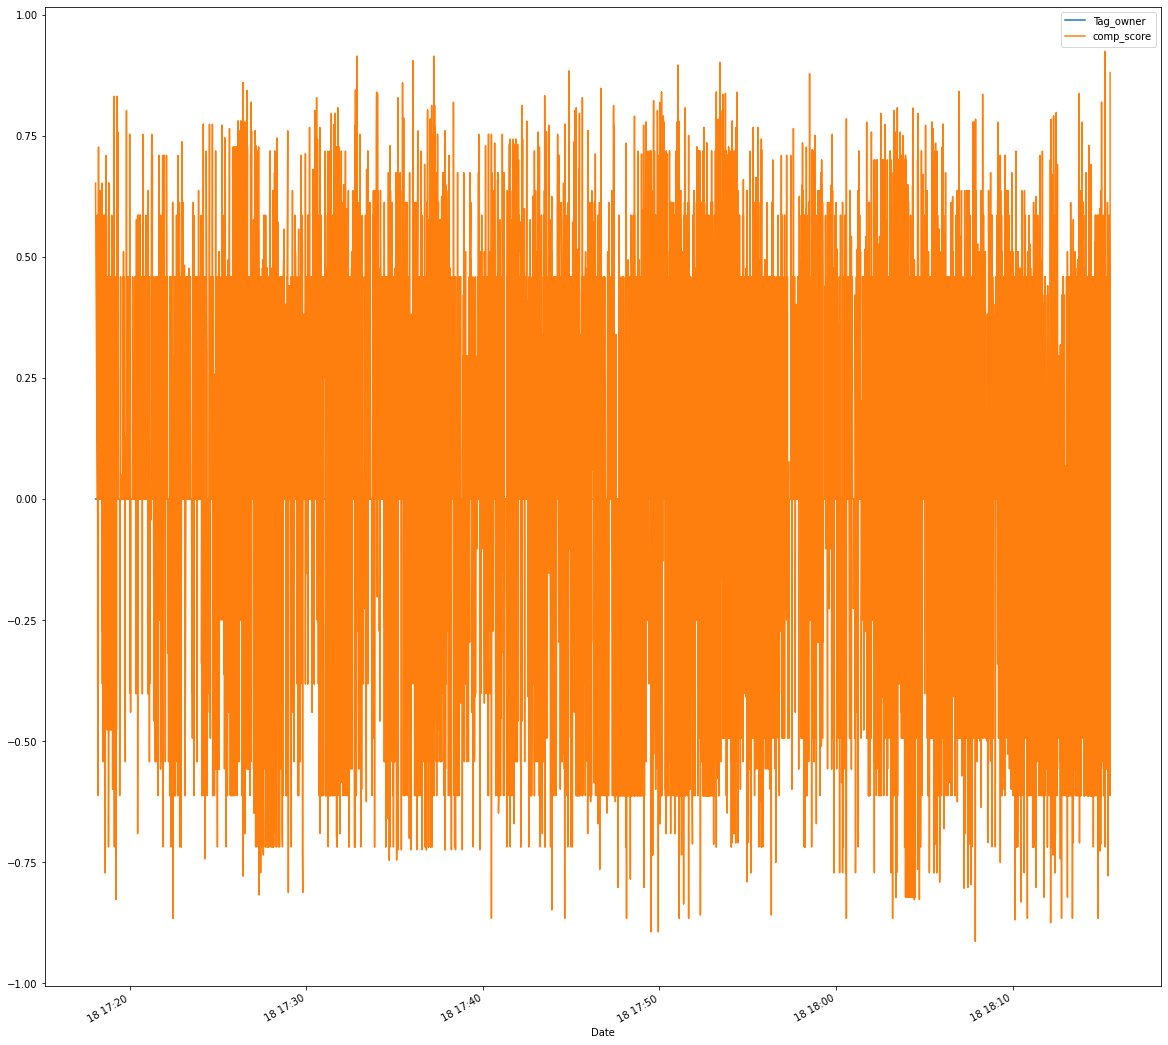

In [135]:
df.plot(figsize=(20, 20))

In [136]:
len(df_new)

100

In [137]:
test_size = 18

test_index = len(df_new) - test_size

In [138]:
test_index

82

In [139]:
test_size

18

In [140]:
train = df.iloc[:test_index]

In [141]:
len(train)

82

In [156]:
test = df.iloc[test_index:-10580]

In [157]:
len(test)

18

In [167]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [168]:
length = 12  # This would be the length of our batches

In [169]:
generator = TimeseriesGenerator(train, train,
                               length = length, batch_size=1)

In [170]:
len(generator)

70

In [172]:
X, y = generator[0.0]

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [0.0] of type float64